# Summary so far
Our television network is looking to have a model that we can run new scripts through, to determine if the movie will do well, by rating the script. We have all the test scripts downloaded and turned into bags-of-words. We also have a list of movie names with ratings. We need to match the ratings to the scripts, clean up the resulting dataframe, and explore our data.

Import the ratings

In [1]:
import pandas as pd

ratings_df = pd.read_csv('filmsCountriesRatings.tsv', sep='\t')

In [2]:
ratings_df.head()

,tconst,titleType,primaryTitle,startYear,genres,title,averageRating,numVotes
0,tt0005809,movie,The Governor,1915.0,Drama,The Governor,6.7,324.0
1,tt0008305,movie,Les Misérables,1917.0,Drama,Les Misérables,6.7,36.0
2,tt0009968,movie,Broken Blossoms,1919.0,"Drama,Romance",Broken Blossoms,7.2,10903.0
3,tt0018455,movie,Sunrise,1927.0,"Drama,Romance",Sunrise,8.1,53184.0
4,tt0020697,movie,The Blue Angel,1930.0,"Drama,Music",The Blue Angel,7.7,16068.0


In [3]:
ratings_df.shape

(1154, 8)

Rename a column so it doesn't get confused with one of the bag-of-words' columns' titles

In [4]:
ratings_df2 = ratings_df.rename(columns={'title': 'movie_title'})

In [5]:
ratings_df2.head()

,tconst,titleType,primaryTitle,startYear,genres,movie_title,averageRating,numVotes
0,tt0005809,movie,The Governor,1915.0,Drama,The Governor,6.7,324.0
1,tt0008305,movie,Les Misérables,1917.0,Drama,Les Misérables,6.7,36.0
2,tt0009968,movie,Broken Blossoms,1919.0,"Drama,Romance",Broken Blossoms,7.2,10903.0
3,tt0018455,movie,Sunrise,1927.0,"Drama,Romance",Sunrise,8.1,53184.0
4,tt0020697,movie,The Blue Angel,1930.0,"Drama,Music",The Blue Angel,7.7,16068.0


In [6]:
ratings_df2.tail()

,tconst,titleType,primaryTitle,startYear,genres,movie_title,averageRating,numVotes
1149,tt9815714,movie,The Hard Way,2019.0,Action,The Hard Way,4.8,3733.0
1150,tt9820556,movie,Breach,2020.0,"Action,Horror,Sci-Fi",Breach,2.9,19550.0
1151,tt9848626,movie,Hotel Transylvania 4: Transformania,2022.0,"Adventure,Animation,Comedy",Hotel Transylvania 4: Transformania,6.0,37212.0
1152,tt9850370,movie,#Anne Frank Parallel Stories,2019.0,"Documentary,Drama,History",#Anne Frank Parallel Stories,6.6,1734.0
1153,tt9896876,movie,India Sweets and Spices,2021.0,Comedy,India Sweets and Spices,6.1,806.0


Read in the bag of words from the scripts

In [7]:
scripts_df = pd.read_csv('scripts/bagOfWordsAndMovieTitle.csv')

In [8]:
scripts_df.head()

,Unnamed: 0,00,000,10,100,101,102,103,104,105,...,yourselves,youth,zero,zip,zips,zone,zoo,zoom,zooms,movie_name
0,0,0,0,0,0,0,0,0,0,0,...,0,14,0,0,0,0,0,0,0,The Maltese Falcon
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Casablanca
2,2,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,The Big Sleep
3,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Strangers on a Train
4,4,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,2,From Here To Eternity


In [9]:
scripts_df.shape

(708, 6689)

In [8]:
scripts_df['Unnamed: 0']

0        0
1        1
2        2
3        3
4        4
      ... 
703    703
704    704
705    705
706    706
707    707
Name: Unnamed: 0, Length: 708, dtype: int64

In [9]:
scripts_df.drop('Unnamed: 0',axis = 1, inplace = True)

In [10]:
scripts_df.head()

,00,000,10,100,101,102,103,104,105,106,...,yourselves,youth,zero,zip,zips,zone,zoo,zoom,zooms,movie_name
0,0,0,0,0,0,0,0,0,0,0,...,0,14,0,0,0,0,0,0,0,The Maltese Falcon
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Casablanca
2,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,The Big Sleep
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Strangers on a Train
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,2,From Here To Eternity


We have more ratings than scripts: that's fine; we'll match the scripts we have.

Let's turn the genres into more words in our bag-of-words

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
matrix_of_counts = cv.fit_transform(ratings_df2.genres)

In [16]:
genre_counts = pd.DataFrame(matrix_of_counts.toarray(),
                      columns=cv.get_feature_names_out())

genre_counts.head()

,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,...,musical,mystery,news,noir,romance,sci,sport,thriller,war,western
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df2 = genre_counts
 
for col in genre_counts.columns:
    new_name = 'genre_' + col
    #print(new_name)
    df2 = df2.rename(columns={col: new_name})

In [18]:
df2.head()

,genre_action,genre_adult,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,...,genre_musical,genre_mystery,genre_news,genre_noir,genre_romance,genre_sci,genre_sport,genre_thriller,genre_war,genre_western
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
ratings_genre_counts =df2.join(ratings_df2)

In [50]:
ratings_genre_counts.head()

,genre_action,genre_adult,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,...,genre_war,genre_western,tconst,titleType,primaryTitle,startYear,genres,movie_title,averageRating,numVotes
0,0,0,0,0,0,0,0,0,1,0,...,0,0,tt0005809,movie,The Governor,1915.0,Drama,The Governor,6.7,324.0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,tt0008305,movie,Les Misérables,1917.0,Drama,Les Misérables,6.7,36.0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,tt0009968,movie,Broken Blossoms,1919.0,"Drama,Romance",Broken Blossoms,7.2,10903.0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,tt0018455,movie,Sunrise,1927.0,"Drama,Romance",Sunrise,8.1,53184.0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,tt0020697,movie,The Blue Angel,1930.0,"Drama,Music",The Blue Angel,7.7,16068.0


The ratings movie titles and the scripts movie titles don't match up exactly, so we have to do fuzzy matching.

In [51]:
# https://www.datacamp.com/tutorial/fuzzy-string-python
from thefuzz import process
from thefuzz import fuzz

scripts_df["movie_name"] = scripts_df["movie_name"].apply(
  lambda x: process.extractOne(x, ratings_genre_counts['primaryTitle'], scorer=fuzz.partial_ratio)[0]
)

Now we can merge the ratings and the scripts. We'll do a left merge with ratings as the left table, so we don't having any ratings without scripts

In [52]:
ratingsScripts = pd.merge(scripts_df,ratings_genre_counts,how = 'left',left_on='movie_name', right_on='primaryTitle')

In [53]:
ratingsScripts.head()

,00,000,10,100,101,102,103,104,105,106,...,genre_war,genre_western,tconst,titleType,primaryTitle,startYear,genres,movie_title,averageRating,numVotes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,tt0073589,movie,The Image,1975.0,"Adult,Drama",The Image,6.2,1885.0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,tt4824256,movie,Blackbear,2019.0,"Drama,Sport",Blackbear,4.3,815.0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,tt2443822,movie,The Boy,2015.0,"Drama,Horror,Thriller",Child,5.5,5686.0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,tt6294226,movie,Stray,2019.0,"Action,Crime,Fantasy",Stray,4.8,908.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,tt0029284,movie,My Favorite Wife,1940.0,"Comedy,Romance",My Favorite Wife,7.3,11277.0


In [24]:
ratingsScripts.shape

(729, 6722)

In [54]:
duplicateRowsDF = ratingsScripts[ratingsScripts.duplicated()]
duplicateRowsDF.shape

(30, 6722)

In [55]:
ratingsScripts.drop_duplicates(inplace = True)

In [56]:
duplicateRowsDF = ratingsScripts[ratingsScripts.duplicated()]
duplicateRowsDF.shape

(0, 6722)

In [57]:
ratingsScripts.shape

(708, 6722)

Set up the dataframe to do machine learning on, by dropping the unnecessary columns

In [58]:
ratingsScriptsML = ratingsScripts.drop(['movie_name','tconst','titleType','primaryTitle','startYear','genres','movie_title','numVotes'], axis=1)

In [59]:
ratingsScriptsML.head()

,00,000,10,100,101,102,103,104,105,106,...,genre_mystery,genre_news,genre_noir,genre_romance,genre_sci,genre_sport,genre_thriller,genre_war,genre_western,averageRating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.2
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4.3
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5.5
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,7.3


In [60]:
ratingsScriptsML.to_csv('ratingsAndBagOfWords.csv')

Look at the correlation of the individual words to the ratings.

In [61]:
import matplotlib.pyplot as plt


matrix = ratingsScriptsML.corr().round(2)

In [62]:
matrix.shape

(6714, 6714)

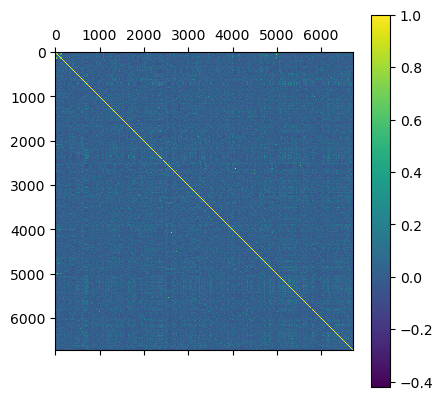

In [63]:
plt.matshow(matrix)
plt.colorbar()
plt.show()

Get the correlations with the ratings by taking the last row.

In [64]:
ratingsCorr=matrix.iloc[-1,:]

In [97]:
ratingsCorr1=abs(ratingsCorr)
ratingsCorr1=ratingsCorr1[0:-1]
n=sorted(ratingsCorr1,reverse = True)
n[0:10]

[0.14, 0.14, 0.12, 0.11, 0.1, 0.1, 0.1, 0.1, 0.09, 0.09]

The highest correlation between ratings and features isn't very high. Let's find out which words have these correlations though.

In [74]:
colNames = list(ratingsScriptsML.columns)

In [86]:
colNamesAndCorr = pd.DataFrame({'words': colNames[0:-1],'correlations':ratingsCorr[0:-1]})
colNamesAndCorr = colNamesAndCorr.reset_index(drop = True)


In [87]:
colNamesAndCorr.head()

,words,correlations
0,00,-0.03
1,000,-0.03
2,10,-0.03
3,100,-0.00
4,101,-0.04


In [95]:
colNamesAndCorr.tail()

,words,correlations
6708,genre_sci,-0.10
6709,genre_sport,0.05
6710,genre_thriller,-0.16
6711,genre_war,0.01
6712,genre_western,0.17


In [93]:
nameAndCorrSorted = colNamesAndCorr.sort_values(by=['correlations'])
nameAndCorrSorted.head(5)

,words,correlations
6701,genre_horror,-0.27
6703,genre_musical,-0.21
6710,genre_thriller,-0.16
6476,watched,-0.14
6037,thrill,-0.14


In [98]:
nameAndCorrSorted.tail(8)

,words,correlations
878,buildings,0.13
6689,genre_adventure,0.14
6702,genre_music,0.15
6712,genre_western,0.17
6695,genre_drama,0.22
6699,genre_film,NaN
6705,genre_news,NaN
6706,genre_noir,NaN


We have too many features for the number of scripts we have. We'll use SVD to reduce them, as it's recommended for sparse data-sets as explained here: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html 

Separate out the features and the predicted variable 

In [100]:
X = ratingsScriptsML.drop('averageRating', axis= 1)
y = ratingsScriptsML['averageRating']

Use 27 features because that's around the square root of the number of scripts we have.

In [101]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 27, random_state = 42)
X_transformed = svd.fit_transform(X)

In [102]:
X_transformed.shape

(708, 27)

In [110]:
#svd.get_feature_names_out(colNames[0:-1])
best_features = [colNames[i] for i in svd.components_[0].argsort()[::-1]]
len(best_features)

6713

In [111]:
X_transformed = pd.DataFrame(X_transformed)

ratingsScriptsTransformed = pd.concat([X_transformed,y], axis = 'columns')

ratingsScriptsTransformed.shape

(735, 28)

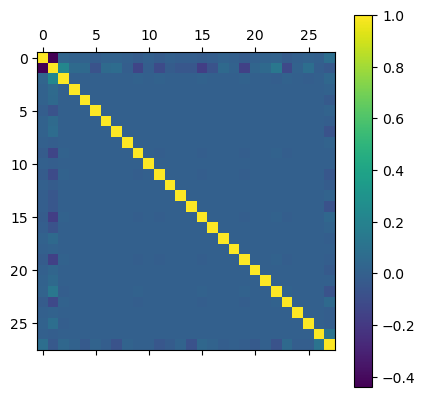

In [112]:
matrix2 = ratingsScriptsTransformed.corr().round(2)
plt.matshow(matrix2)
plt.colorbar()
plt.show()

In [113]:
ratingsCorr2=matrix2.iloc[-1,:]
ratingsCorr2=abs(ratingsCorr2)
ratingsCorr2=ratingsCorr2[0:-1]
n=sorted(ratingsCorr2,reverse = True)
n[0:10]

[0.11, 0.08, 0.08, 0.07, 0.07, 0.05, 0.05, 0.04, 0.04, 0.04]

The correlation for the SVD features is even smaller than the raw features. However, we do need to shrink our number of features. We don't want to use PCA because that expects a dense matrix, and we have a sparse one. We also don't want to use LDA as LDA is for classification, and this is a regression problem. We'll stick with SVD for our features. 

Let's try a smaller number of features in SVD

In [117]:
svd7 = TruncatedSVD(n_components = 7, random_state = 42)
X_transformed7 = svd7.fit_transform(X)

In [118]:
X_transformed7 = pd.DataFrame(X_transformed7)

ratingsScriptsTransformed7 = pd.concat([X_transformed7,y], axis = 'columns')

ratingsScriptsTransformed7.shape

(735, 8)

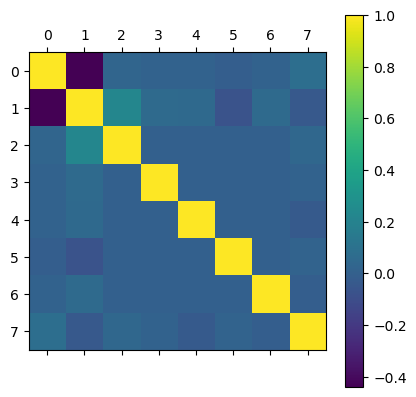

In [119]:
matrix3 = ratingsScriptsTransformed7.corr().round(2)
plt.matshow(matrix3)
plt.colorbar()
plt.show()

In [121]:
ratingsCorr3=matrix3.iloc[-1,:]
ratingsCorr3=abs(ratingsCorr3)
ratingsCorr3=ratingsCorr3[0:-1]
n=sorted(ratingsCorr3,reverse = True)
print(n)

[0.08, 0.04, 0.04, 0.03, 0.02, 0.01, 0.01]


This has smaller correlation than the square root SVD. 

Let's examine the ratings.

In [114]:
y.describe()

count    708.000000
mean       5.984746
std        1.417498
min        1.600000
25%        4.900000
50%        6.200000
75%        7.100000
max        9.300000
Name: averageRating, dtype: float64

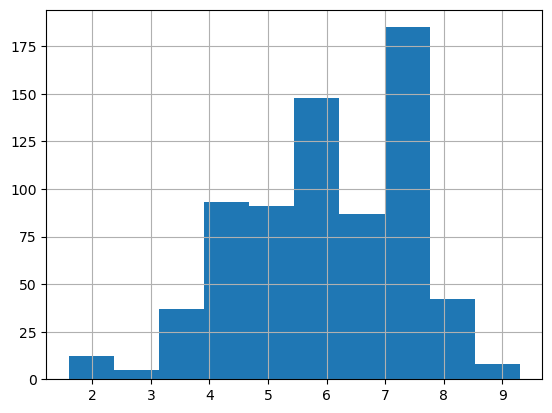

In [115]:
y.hist(bins = 10)
plt.show()

Save the original ratings and scripts dataframe.

In [116]:
ratingsScripts.to_csv('ratingsAndScriptsBagOfWords.csv')

We're not going to save X and y; we're going to split the data into test and training data, and fit SVD only on the training data. Something to look forward to in the modeling section!